<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data07/lol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝 연습/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
#상관관계
re_p = df.corr(method='pearson')
re_p

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,0.015551,-0.007467,-0.033754,-0.040956,-0.040852,-0.002917,-0.004193,-0.014670,-0.012315,-0.002917,-0.033754,0.007405,-0.001197,0.011577,-0.013160,-0.038993,-0.008664,0.017296,0.017416,0.006163,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,0.115566,0.417213,0.357820,0.396141,0.224909,0.131445,0.511119,0.489558,0.224909,0.417213,-0.023671,-0.055400,-0.201769,-0.339297,0.337358,-0.271047,-0.221551,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,0.019725,0.034349,0.031719,-0.033925,0.010501,0.015800,0.027943,-0.033925,0.019725,-0.012906,0.115549,-0.003228,-0.002612,0.018138,-0.009009,-0.022817,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,0.060054,0.060294,0.067462,0.111028,-0.023452,0.078585,0.077946,0.111028,0.060054,0.135966,0.123919,-0.017717,-0.073182,0.033748,-0.046212,-0.034509,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,0.312058,0.177617,0.190365,0.125642,0.018190,0.378511,0.240665,0.125642,0.312058,-0.019142,-0.043304,-1.000000,-0.247929,0.269425,-0.201140,-0.141627,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,0.888751,0.434867,0.472155,-0.030880,-0.112506,0.654148,0.583730,-0.030880,0.888751,-0.034239,-0.092278,-0.269425,0.004044,1.000000,-0.020344,-0.224564,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,-0.162572,-0.414755,-0.460122,-0.468560,-0.228102,-0.640000,-0.577613,-0.468560,-0.162572,0.008102,0.038672,0.247929,1.000000,0.004044,0.804023,0.163340,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,0.748352,0.292661,0.303022,-0.062035,-0.134023,0.549761,0.437002,-0.062035,0.748352,-0.032474,-0.064501,-0.229485,-0.026372,0.813667,-0.007481,-0.182985,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,0.239396,0.203530,0.232774,0.118762,0.198378,0.281464,0.263991,0.118762,0.239396,-0.017292,-0.005288,-0.151603,-0.204764,

In [ ]:
# blueWins 와 상관관계가 0.2가 넘는것들
re_p1 = re_p[re_p['blueWins']>=0.2]
re_p1['blueWins']

blueWins                  1.000000
blueFirstBlood            0.201769
blueKills                 0.337358
blueAssists               0.276685
blueEliteMonsters         0.221944
blueDragons               0.213768
blueTotalGold             0.417213
blueAvgLevel              0.357820
blueTotalExperience       0.396141
blueTotalMinionsKilled    0.224909
blueGoldDiff              0.511119
blueExperienceDiff        0.489558
blueCSPerMin              0.224909
blueGoldPerMin            0.417213
redDeaths                 0.337358
Name: blueWins, dtype: float64

In [ ]:
# 상관관계가 0.2 넘는것들을 컬럼에 추가
bluewin = pd.DataFrame(columns=['KillDiff','FirstBlood' , 'AssistDiff', 'GoldDiff', 'Dragon', 
                                'Herald','ExperienceDiff', 'TowersDestroyed', 'MinionDiff'])

# 상관관계 0.4 넘는것들
# bluewin = pd.DataFrame(columns=['blueTotalGold','blueGoldDiff','blueExperienceDiff','blueGoldPerMin'])

In [ ]:
# 상관관계 0.2
bluewin['win'] = df['blueWins']
bluewin['KillDiff'] = df['blueKills'] - df['redKills']
bluewin['FirstBlood'] = df['blueFirstBlood'] - df['redFirstBlood']
bluewin['AssistDiff'] = df['blueAssists'] - df['redAssists']
bluewin['GoldDiff'] = df['blueGoldDiff'] / 100
bluewin['Dragon'] = df['blueDragons']
bluewin['Herald'] = df['blueHeralds']
bluewin['ExperienceDiff'] = df['blueExperienceDiff'] / 100
bluewin['TowersDestroyed'] = df['blueTowersDestroyed']
bluewin['MinionDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled']

# 0.4
# bluewin['blueTotalGold'] = df['blueTotalGold']
# bluewin['blueGoldDiff'] = df['blueGoldDiff']
# bluewin['blueExperienceDiff'] = df['blueExperienceDiff']
# bluewin['blueGoldPerMin'] = df['blueGoldPerMin']

In [ ]:
bluewin

,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,0,-1,3,-29.08,0,0,-11.73,0,-66,0
2,-4,-1,-10,-11.72,1,0,-10.33,0,-17,0
3,-1,-1,-5,-13.21,0,1,-0.07,0,-34,0
4,0,-1,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...
9874,3,1,-2,25.19,1,0,24.69,0,-18,1
9875,2,-1,5,7.82,1,0,8.88,0,27,1
9876,-1,-1,-6,-24.16,0,0,-18.77,0,-51,0
9877,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [ ]:
bluewin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KillDiff,9879.0,0.046260,4.195489,-17.00,-3.000,0.00,3.00,16.00
FirstBlood,9879.0,0.009616,1.000004,-1.00,-1.000,1.00,1.00,1.00
AssistDiff,9879.0,-0.017006,5.766787,-25.00,-4.000,0.00,4.00,23.00
GoldDiff,9879.0,0.144141,24.533492,-108.30,-15.855,0.14,15.96,114.67
Dragon,9879.0,0.361980,0.480597,0.00,0.000,0.00,1.00,1.00
Herald,9879.0,0.187974,0.390712,0.00,0.000,0.00,0.00,1.00
ExperienceDiff,9879.0,-0.336203,19.203704,-93.33,-12.905,-0.28,12.12,83.48
TowersDestroyed,9879.0,0.051422,0.244369,0.00,0.000,0.00,0.00,4.00
MinionDiff,9879.0,-0.649661,30.942675,-120.00,-21.000,-1.00,20.00,127.00
win,9879.0,0.499038,0.500024,0.00,0.000,0.00,1.00,1.00


In [ ]:
# 1%, 5%, 25%, 50%, 75%, 95%, 99% 보여주기
des = bluewin.describe(percentiles=[.01,.05,.25, .75,.95,.99])
des.transpose()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
KillDiff,9879.0,0.046260,4.195489,-17.00,-10.0000,-7.000,-3.000,0.00,3.00,7.000,10.0000,16.00
FirstBlood,9879.0,0.009616,1.000004,-1.00,-1.0000,-1.000,-1.000,1.00,1.00,1.000,1.0000,1.00
AssistDiff,9879.0,-0.017006,5.766787,-25.00,-14.0000,-10.000,-4.000,0.00,4.00,9.000,14.0000,23.00
GoldDiff,9879.0,0.144141,24.533492,-108.30,-57.3610,-40.332,-15.855,0.14,15.96,40.740,58.7486,114.67
Dragon,9879.0,0.361980,0.480597,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00
Herald,9879.0,0.187974,0.390712,0.00,0.0000,0.000,0.000,0.00,0.00,1.000,1.0000,1.00
ExperienceDiff,9879.0,-0.336203,19.203704,-93.33,-45.8528,-32.061,-12.905,-0.28,12.12,31.093,46.4810,83.48
TowersDestroyed,9879.0,0.051422,0.244369,0.00,0.0000,0.000,0.000,0.00,0.00,0.000,1.0000,4.00
MinionDiff,9879.0,-0.649661,30.942675,-120.00,-73.0000,-52.000,-21.000,-1.00,20.00,50.000,73.0000,127.00
win,9879.0,0.499038,0.500024,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.0000,1.00


In [ ]:
# 1%, 99% 날리기
bluewin = bluewin[bluewin['KillDiff']<10]
bluewin = bluewin[bluewin['KillDiff']>-10]
bluewin = bluewin[bluewin['AssistDiff']<14]
bluewin = bluewin[bluewin['AssistDiff']>-14]
bluewin = bluewin[bluewin['GoldDiff']<58.75]
bluewin = bluewin[bluewin['GoldDiff']>-57.361]
bluewin = bluewin[bluewin['ExperienceDiff']<46.481]
bluewin = bluewin[bluewin['ExperienceDiff']>-45.8528]
bluewin = bluewin[bluewin['MinionDiff']<73]
bluewin = bluewin[bluewin['MinionDiff']>-73]
bluewin

,KillDiff,FirstBlood,AssistDiff,GoldDiff,Dragon,Herald,ExperienceDiff,TowersDestroyed,MinionDiff,win
0,3,1,3,6.43,0,0,-0.08,0,-2,0
1,0,-1,3,-29.08,0,0,-11.73,0,-66,0
2,-4,-1,-10,-11.72,1,0,-10.33,0,-17,0
3,-1,-1,-5,-13.21,0,1,-0.07,0,-34,0
4,0,-1,-1,-10.04,0,0,2.30,0,-15,0
...,...,...,...,...,...,...,...,...,...,...
9874,3,1,-2,25.19,1,0,24.69,0,-18,1
9875,2,-1,5,7.82,1,0,8.88,0,27,1
9876,-1,-1,-6,-24.16,0,0,-18.77,0,-51,0
9877,-1,1,2,-8.39,1,0,-10.85,0,-23,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_data = bluewin.loc[:, 'KillDiff':'MinionDiff'] # 문제데이터
y_data = bluewin.loc[:, 'win'] # 정답데이터

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, # 문제 데이터
    y_data, # 답 데이터
    test_size =0.2, # 비율
    shuffle = True, # 셔플링 여부
    random_state = 20 # 시드값
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=11)

In [ ]:
clf_list = [rf_clf, lr_clf, knn5, knn10]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def callKFold_all(clf_list):
    for clf in clf_list:
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        for iter_count, accuracy in enumerate(scores):
            print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        print("평균 정확도: {0:.4f}".format(np.mean(scores)))

In [ ]:
first_result = callKFold_all(clf_list)
first_result

교차 검증 0 정확도: 0.6931
교차 검증 1 정확도: 0.6938
교차 검증 2 정확도: 0.6992
교차 검증 3 정확도: 0.6911
교차 검증 4 정확도: 0.6999
평균 정확도: 0.6954
교차 검증 0 정확도: 0.7134
교차 검증 1 정확도: 0.7249
교차 검증 2 정확도: 0.7053
교차 검증 3 정확도: 0.7060
교차 검증 4 정확도: 0.7229
평균 정확도: 0.7145
교차 검증 0 정확도: 0.6551
교차 검증 1 정확도: 0.6558
교차 검증 2 정확도: 0.6619
교차 검증 3 정확도: 0.6660
교차 검증 4 정확도: 0.6653
평균 정확도: 0.6608
교차 검증 0 정확도: 0.6883
교차 검증 1 정확도: 0.6782
교차 검증 2 정확도: 0.6856
교차 검증 3 정확도: 0.6951
교차 검증 4 정확도: 0.6911
평균 정확도: 0.6877


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 모델별 파라미터 설정값

# model = [dt_clf, rf_clf, lr_clf, svm_svc, knn]
#     pa = [{'max_depth':[2,3,5,10],
#                  'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]},
#           {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]},
#           {'penalty':['l2', 'l1'],'C':[0.01, 0.1, 1, 1, 5, 10]},
#            {'kernel': ['rbf'],'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
#             'C': [0.01, 0.1, 1, 10, 100, 1000]},
#            {'n_neighbors' : list(range(1,20))}]

In [ ]:
params = {"C":[1,3,5,7,9]} # 규제 강도 설정
grid_lr_clf = GridSearchCV(lr_clf, param_grid=params, cv = 4, scoring='accuracy', verbose=1)
grid_lr_clf.fit(x_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7, 9]}, scoring='accuracy', verbose=1)

In [ ]:
best_lr_clf = grid_lr_clf.best_estimator_
best_lr_clf

LogisticRegression(C=1)

In [ ]:
best_params_lr_clf = grid_lr_clf.best_params_
best_params_lr_clf

{'C': 1}

In [ ]:
best_score_lr_clf = grid_lr_clf.best_score_
best_score_lr_clf

0.7157181571815718

In [ ]:
pred = best_lr_clf.predict(x_test)
pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.738353196099675

In [ ]:
dpredictions = best_lr_clf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 LR 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 LR 정확도 : 0.7384


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dpredictions))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       916
           1       0.74      0.75      0.74       930

    accuracy                           0.74      1846
   macro avg       0.74      0.74      0.74      1846
weighted avg       0.74      0.74      0.74      1846



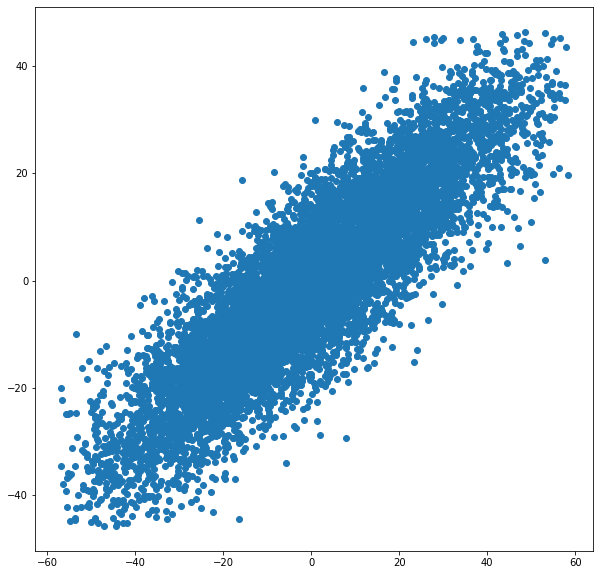

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.scatter(bluewin['GoldDiff'],bluewin['ExperienceDiff'])

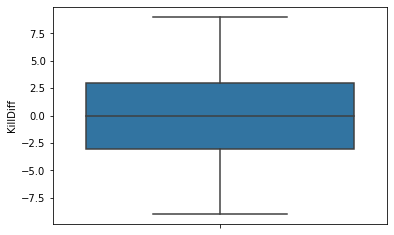

In [68]:
sns.boxplot(y=bluewin['KillDiff'])

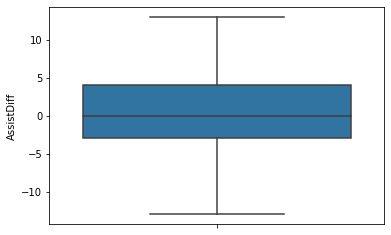

In [69]:
sns.boxplot(y=bluewin['AssistDiff'])

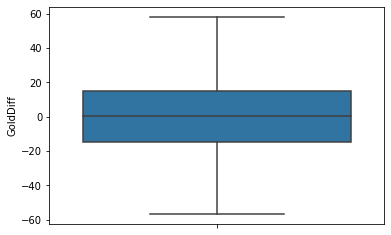

In [70]:
sns.boxplot(y=bluewin['GoldDiff'])

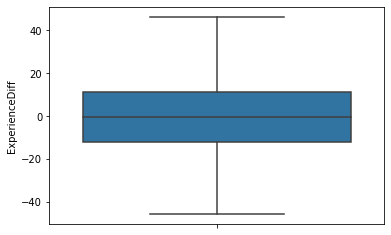

In [71]:
sns.boxplot(y=bluewin['ExperienceDiff'])

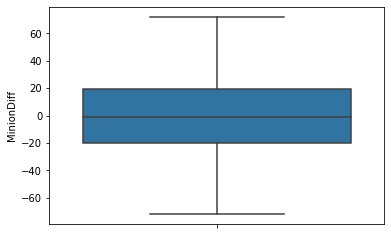

In [72]:
sns.boxplot(y=bluewin['MinionDiff'])

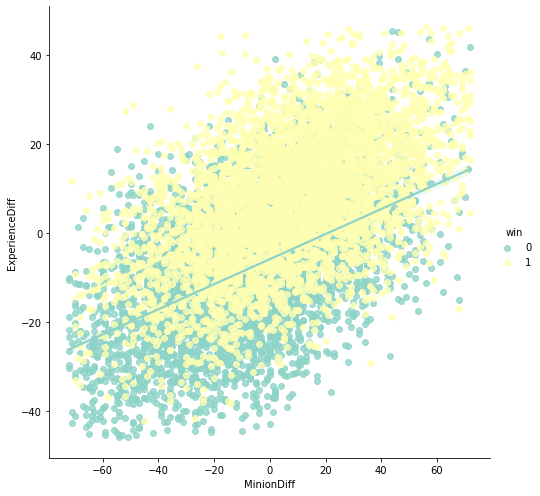

In [73]:
sns.lmplot(x='MinionDiff', y='ExperienceDiff', hue = 'win', 
           data=bluewin, palette='Set3', size=7)

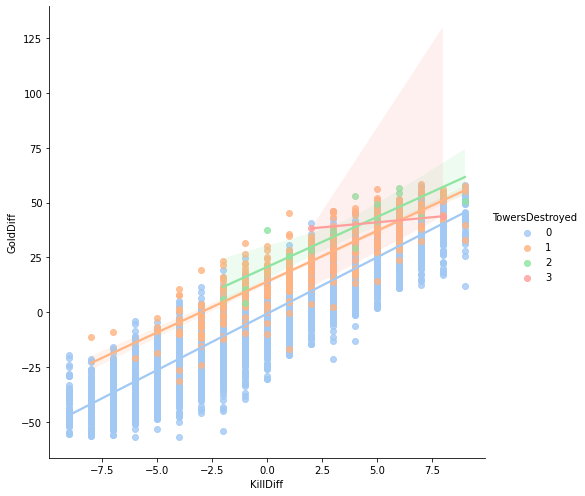

In [74]:
sns.lmplot(x='KillDiff', y='GoldDiff', hue = 'TowersDestroyed', 
           data=bluewin, palette='pastel', size=7)